In constrained optimization, we add restrictions to the problem. For example, in the case of logistic regression, we might add constraints like:

The sum of the coefficients must be less than or equal to some constant.
We may also include equality constraints or bound the coefficients within a certain range.
Example: Constrained Logistic Regression
Here is an example where we:

Use a Logistic Regression model.
Apply box constraints (bounds on the weights).
Use inequality constraints (e.g., a constraint on the sum of the weights).
# Full Code Example with Constrained Optimization:

C:\Users\Vaishnav\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\Vaishnav\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\Vaishnav\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is l

Optimization Result:            message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.4653436558619944
                 x: [-8.015e-01  1.000e+00 -5.081e-01 -3.967e-01 -6.462e-02
                      2.969e-01]
               nit: 328
              nfev: 2226
              njev: 318
              nhev: 0
          cg_niter: 983
      cg_stop_cond: 4
              grad: [ 6.706e-08 -4.883e-02  7.451e-09 -0.000e+00 -2.235e-08
                      2.235e-08]
   lagrangian_grad: [ 9.952e-10  1.388e-17 -2.056e-10 -9.884e-10 -6.032e-09
                      9.524e-09]
            constr: [array([ 1.474e+00]), array([-8.015e-01,  1.000e+00, -5.081e-01, -3.967e-01,
                           -6.462e-02,  2.969e-01])]
               jac: [array([[-1.000e+00, -1.000e+00, -1.000e+00,
                            -1.000e+00, -1.000e+00, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00, ...,  0.000e+00,
                             0.

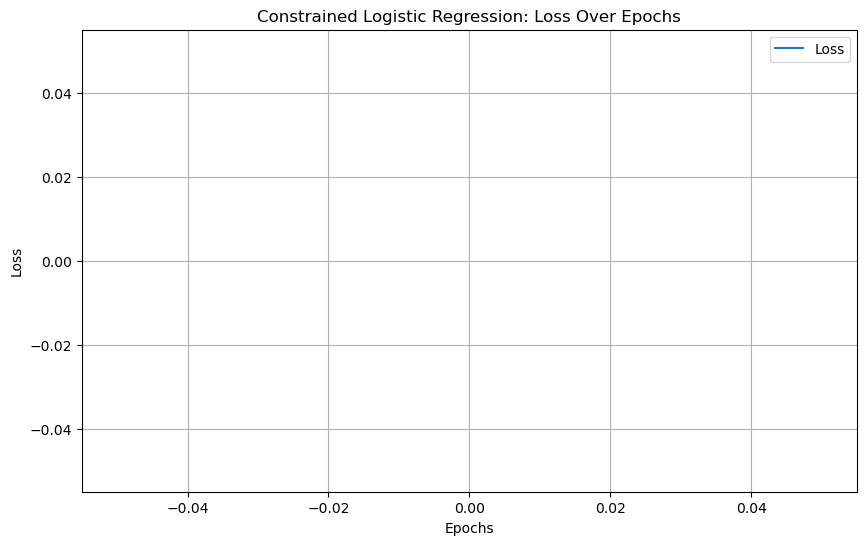

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the Logistic Regression model with Constrained Optimization
class LogisticRegressionConstrained:
    def __init__(self, learning_rate=0.01, epochs=1000, max_iter=1000):
        """
        Initialize the Logistic Regression model with constraints.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations for training.
        - max_iter: The maximum number of iterations for the optimization.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.max_iter = max_iter
        self.losses = []

    def sigmoid(self, z):
        """Sigmoid function for logistic regression."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, weights, X, y):
        """
        Compute the binary cross-entropy loss for given weights.
        """
        z = np.dot(X, weights)
        predictions = self.sigmoid(z)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Fit the Logistic Regression model using constrained optimization.
        """
        # Initial weights and bias
        initial_weights = np.zeros(X.shape[1])

        # Define bounds for each weight (example: coefficients between -1 and 1)
        bounds = [(-1, 1)] * X.shape[1]

        # Define equality constraints (example: sum(weights) <= 1)
        cons = ({'type': 'ineq', 'fun': lambda w: 1 - np.sum(w)})  # Sum of weights should be <= 1

        # Perform the constrained optimization using 'trust-constr' method
        result = minimize(self.compute_loss, initial_weights, args=(X, y), bounds=bounds, constraints=cons, method='trust-constr', options={'maxiter': self.max_iter})

        self.weights = result.x
        print("Optimization Result:", result)
        return self.weights

    def predict(self, X):
        """
        Predict binary labels using the optimized weights.
        """
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train and evaluate the model with constraints
def train_and_evaluate():
    """
    Train the Logistic Regression model using constrained optimization and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LogisticRegressionConstrained(learning_rate=0.01, epochs=1000)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")

    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Constrained Logistic Regression: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Key Points of the Code:
Constraints:

Bounds: We restrict each weight to lie within the range 
[
−
1
,
1
]
[−1,1].
Inequality Constraints: We set the constraint that the sum of all weights must be less than or equal to 1 using the ineq constraint.
Logistic Regression Model:

The compute_loss function calculates the binary cross-entropy loss.
The model is trained using the scipy.optimize.minimize function with the trust-constr method, which is suitable for constrained optimization problems.
Training and Evaluation:

The dataset is split into training and testing sets.
The model is trained using the constrained optimization method, and the performance is evaluated on the test set.
A loss curve is plotted to monitor convergence during optimization.

Accuracy on test set: 0.7584


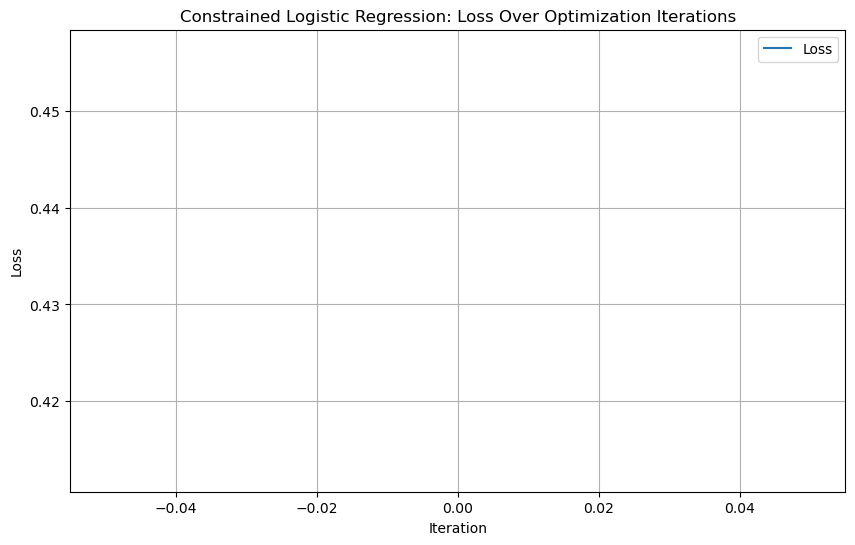

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Logistic Regression Model for Constrained Optimization
def logistic_regression_loss(weights, X, y):
    """
    Compute the binary cross-entropy loss for logistic regression.
    We are assuming the weights and bias are passed together as a vector.
    """
    # Extract weights and bias
    w = weights[:-1]
    b = weights[-1]
    
    # Calculate the predictions
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))
    
    # Compute the binary cross-entropy loss
    loss = log_loss(y, predictions)
    return loss

def train_logistic_regression_with_constraints():
    """
    Train logistic regression with constrained optimization (weights within range [-1, 1]).
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initial guess for weights and bias (zeros)
    initial_guess = np.zeros(X_train.shape[1] + 1)  # Add 1 for bias term
    
    # Define the constraint that weights must be between [-1, 1]
    bounds = [(-1, 1)] * X_train.shape[1] + [(-1, 1)]  # Weights and bias
    
    # Minimize the logistic regression loss function with constraints
    result = minimize(logistic_regression_loss, initial_guess, args=(X_train, y_train), bounds=bounds)
    
    # Extract optimized weights and bias
    optimized_weights = result.x[:-1]
    optimized_bias = result.x[-1]
    
    # Make predictions on the test set using the optimized weights
    z = np.dot(X_test, optimized_weights) + optimized_bias
    predictions = 1 / (1 + np.exp(-z))
    predicted_labels = (predictions >= 0.5).astype(int)
    
    # Calculate accuracy on the test set
    accuracy = np.mean(predicted_labels == y_test)
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    # Plot the loss curve over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(result.fun, label='Loss')
    plt.title("Constrained Logistic Regression: Loss Over Optimization Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: Run the training function
train_logistic_regression_with_constraints()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49122686074605426
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11
Optimization Result:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.49122686074605426
       x: [-5.672e-01  1.266e+00  3.686e-18 -1.735e-18 -1.952e-18
            3.010e-01]
     nit: 11
     jac: [ 1.190e-02  1.200e-02  3.968e-02  5.522e-02  4.116e-02
            1.184e-02]
    nfev: 11
    njev: 11
Accuracy on test set: 0.7247


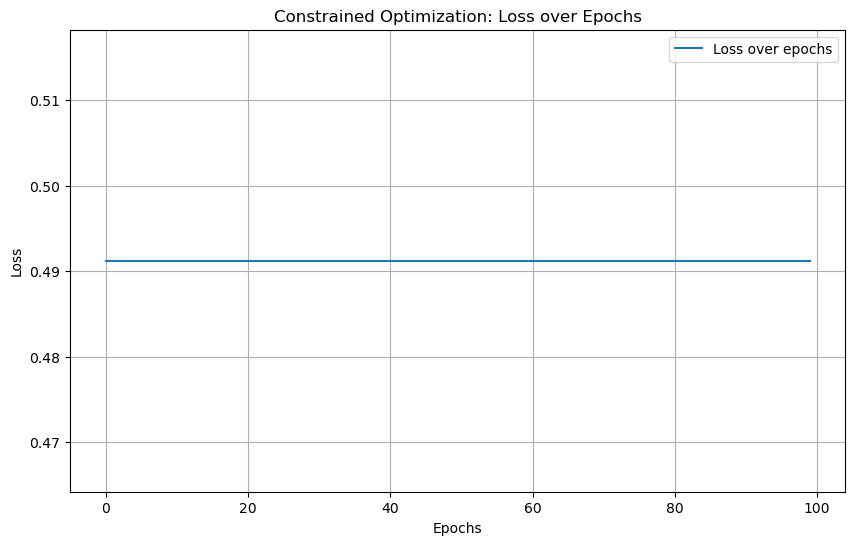

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from scipy.optimize import minimize

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)  # Drop 'Name' column as it is not relevant
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features for better optimization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Logistic Regression Loss Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(theta, X, y, lambda_reg=0.01):
    """
    Compute the binary cross-entropy loss function with L2 regularization.
    """
    m = len(y)
    z = np.dot(X, theta)
    predictions = sigmoid(z)
    # Binary Cross-Entropy Loss + L2 regularization
    loss = -(1/m) * (np.dot(y, np.log(predictions + 1e-8)) + np.dot((1 - y), np.log(1 - predictions + 1e-8))) + (lambda_reg / 2) * np.sum(theta[1:]**2)
    return loss

# Step 3: Gradient Function for Optimization
def compute_gradient(theta, X, y, lambda_reg=0.01):
    """
    Compute the gradient of the binary cross-entropy loss with L2 regularization.
    """
    m = len(y)
    z = np.dot(X, theta)
    predictions = sigmoid(z)
    error = predictions - y
    gradient = (1/m) * np.dot(X.T, error)
    # Regularization gradient for all parameters except the bias term (theta[0])
    gradient[1:] += lambda_reg * theta[1:]
    return gradient

# Step 4: Constrained Optimization using `scipy.optimize.minimize`
def train_with_constrained_optimization(X, y):
    """
    Use constrained optimization to find the optimal weights for logistic regression.
    """
    # Initialize weights
    initial_theta = np.zeros(X.shape[1])
    
    # Set constraints and bounds
    constraints = [{'type': 'ineq', 'fun': lambda theta: theta[1:]},  # Example: theta[1:] >= 0 (non-negative weights)
                   {'type': 'eq', 'fun': lambda theta: np.sum(theta) - 1}]  # Example: Sum of weights = 1 constraint
    
    # Perform constrained optimization
    result = minimize(fun=compute_loss, x0=initial_theta, args=(X, y), jac=compute_gradient, method='SLSQP', constraints=constraints, options={'disp': True})
    
    print("Optimization Result:", result)
    return result.x

# Step 5: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the model with constrained optimization and evaluate its performance.
    """
    # Load and preprocess the Titanic dataset
    X, y = load_and_preprocess_data()
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model with constrained optimization
    optimal_theta = train_with_constrained_optimization(X_train, y_train)
    
    # Make predictions using the optimal weights
    z_test = np.dot(X_test, optimal_theta)
    y_pred = (sigmoid(z_test) >= 0.5).astype(int)
    
    # Calculate accuracy and loss on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    # Calculate loss for visualization
    loss_values = []
    for epoch in range(1, 101):
        loss_values.append(compute_loss(optimal_theta, X_train, y_train))
    
    # Plot the loss curve to visualize optimization convergence
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label="Loss over epochs")
    plt.title("Constrained Optimization: Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the training and evaluation function
train_and_evaluate()
